In [1]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from pulse2percept.implants import ArgusII, ProsthesisSystem, ElectrodeGrid, DiskElectrode
from pulse2percept.models import Model, ScoreboardModel, AxonMapModel
from pulse2percept.viz import plot_implant_on_axon_map

import torch
from torchvision import datasets, transforms
from multiprocessing import cpu_count, Pool
from skimage.transform import resize

from retinal_implants_utils import *

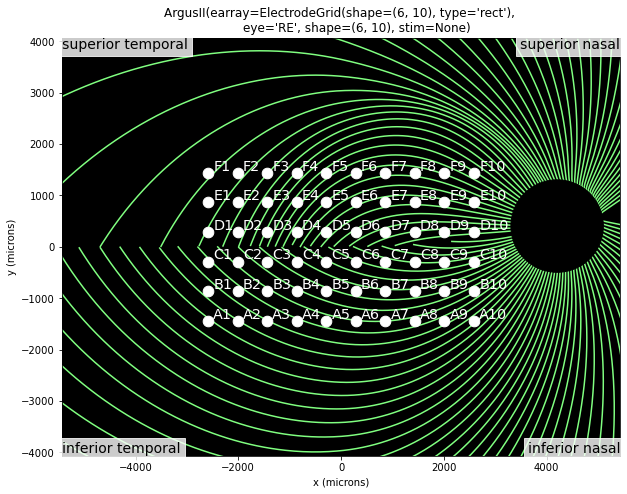

In [107]:
argus = ArgusII()
plot_implant_on_axon_map(argus, annotate_implant=True, annotate_quadrants=True)
plt.savefig('ArgusII_on_AxonMap', bbox_inches='tight')

In [2]:
%matplotlib inline

Initialize Custom Implant

In [92]:
ci = CustomImplant(e_num_side=15, e_radius=30, total_area=4000)

Plot the Custom Implant on an Axon Map

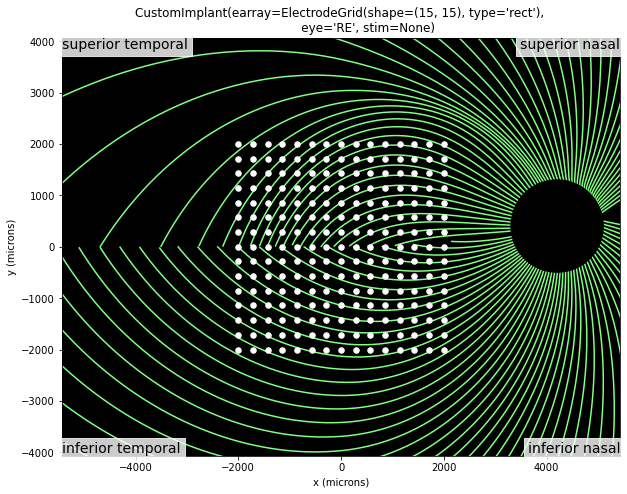

In [93]:
plot_implant_on_axon_map(ci, annotate_implant=False, annotate_quadrants=True)
plt.savefig('custom_50microns_15x15_4000area_on_AxonMap', bbox_inches='tight')

Create the retinal model

In [31]:
# Initialize models
axonMap_model    = AxonMapModel()
scoreBoard_model = ScoreboardModel()

# Build models
axonMap_model.build()
scoreBoard_model.build()

ScoreboardModel(engine='serial', grid_type='rectangular', 
                n_jobs=1, rho=100, scheduler='threading', 
                spatial=ScoreboardSpatial, temporal=None, 
                thresh_percept=0, verbose=True, 
                xrange=(-20, 20), xystep=0.25, 
                yrange=(-15, 15))

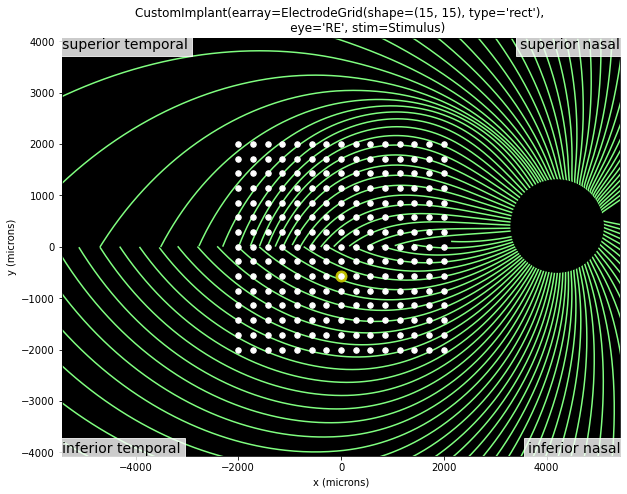

In [94]:
stim_one_electrode      = np.zeros([15, 15]).flatten()
stim_one_electrode[82]  = 1

ci.stim = stim_one_electrode
percept_axon_one_electrode   = axonMap_model.predict_percept(ci)
percept_sboard_one_electrode = scoreBoard_model.predict_percept(ci)

plot_implant_on_axon_map(ci, annotate_implant=False, annotate_quadrants=True)
plt.savefig('custom_50microns_15x15_4000area_on_AxonMap_one_electrode', bbox_inches='tight')

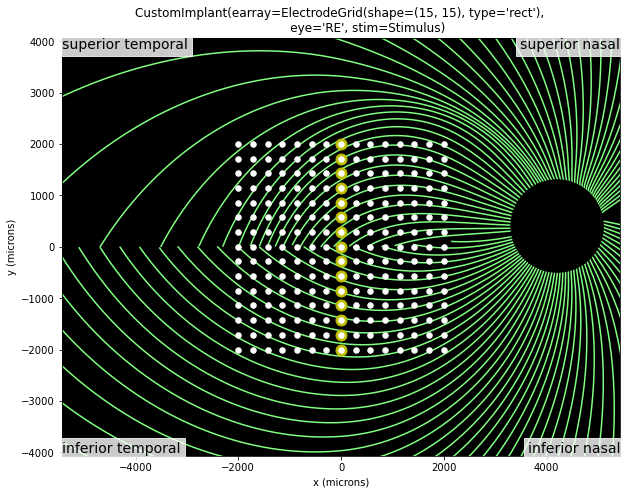

In [95]:
stim_I_shape_electrodes       = np.zeros([15, 15])
stim_I_shape_electrodes[:, 7] = 1
stim_I_shape_electrodes       = stim_I_shape_electrodes.flatten()

ci.stim = stim_I_shape_electrodes
percept_axon_I_shape_electrodes   = axonMap_model.predict_percept(ci)
percept_sboard_I_shape_electrodes = scoreBoard_model.predict_percept(ci)

plot_implant_on_axon_map(ci, annotate_implant=False, annotate_quadrants=True)
plt.savefig('custom_50microns_15x15_4000area_on_AxonMap_I_shape_electrodes', bbox_inches='tight')

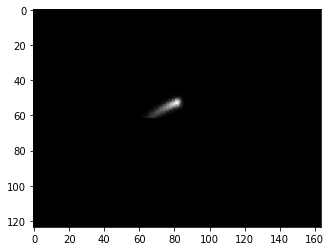

In [96]:
plt.imshow(percept_axon_center_electrode.data.squeeze(), cmap='gray')
plt.savefig('center_electrode_response_on_AxonMap', bbox_inches='tight')

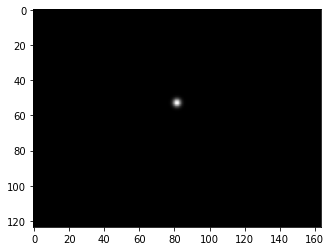

In [97]:
plt.imshow(percept_sboard_one_electrode.data.squeeze(), cmap='gray')
plt.savefig('idea_one_electrode_response', bbox_inches='tight')

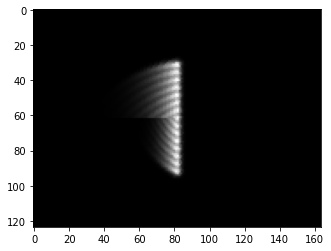

In [98]:
plt.imshow(percept_axon_I_shape_electrodes.data.squeeze(), cmap='gray')
plt.savefig('I_shape_electrodes_response_on_AxonMap', bbox_inches='tight')

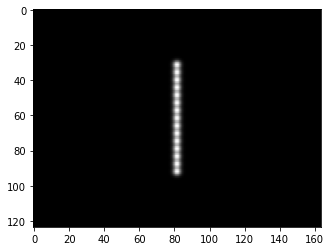

In [99]:
plt.imshow(percept_sboard_I_shape_electrodes.data.squeeze(), cmap='gray')
plt.savefig('idea_I_shape_electrodes_response', bbox_inches='tight')